# LOOKING FOR A PATTERN - USED CAR PRICE PREDICTION

## PRACTICES IN THIS NOTEBOOK

* Gradient Boosting Regressor
* Linear Regression
* Polynomial Regression
* Deep learning - LSTM
* Unsupervised learning - Clustering
* Hyperparameter tuning
* Explatory Data Analysis
* Data visualization

# Table of Contents

- **Introduction**

- **1. Problem Statement**

- **2. Import Libraries**

- **3. Load Data**

- **4. Strategy**

- **5. Data Analysis**
  - **5.1. Data Visualization**
    - 5.1.1. Scatter Plot of all prices above 1 Million
    - 5.1.2. Line Plot of all indices above 1 Million (3 groups separated)
    - 5.1.3. Density Plot of Indices
    - 5.1.4. Distribution in one place
    - 5.1.5. Differences between consecutive indices
    - 5.1.6. Differences between consecutive indices - All groups in one

  - **5.2. Statistical Summary of Indices**
    - 5.2.1. Indices numbers
    - 5.2.2. Index differences

  - **5.3. Sequence Analysis**
    - 5.3.1. Arithmetic Sequences
    - 5.3.2. Geometric Sequences

  - **5.4. Regression Analysis**
    - 5.4.1. Linear Regression for Index Numbers
    - 5.4.2. Linear Regression for Differences between index numbers
    - 5.4.3. Polynomial Regression for Differences between index numbers

  - **5.5. Cluster Analysis**
    - 5.5.1. Analysis on Differences

  - **5.6. Try to Understand Randomness**

  - **5.7. Deep Learning to Predict Pattern**

  - **5.8. Gradient Boosting Regressor to Predict Pattern**

- **6. Conclusion**

# Introduction

In this notebook, we are investigating a pattern highlighted in the Used Car Price Regression Problem. Specifically, we observe an unusual clustering of car prices above 1.5 million.

Cars priced over 1.5 million fall into three distinct groups, with zero price variance within each group. This lack of variance is highly unrealistic and suggests potential data quality issues. As shown in the plot, this error pattern may have been systematically introduced into the dataset by assigning three fixed values to these vehicles instead of recording their actual prices.

* Luxury Brands: The cars belong to luxury or high-performance manufacturers such as Porsche, Rolls-Royce, and Lamborghini.
* Recent Models or Premium Lineups: They are either very recent models or part of premium lineups, which typically command high prices.
* Data Entry Errors: Despite their high market values, these entries might have been misclassified due to mistakes in data entry or formatting—such as misplaced commas, incorrect scaling, or unit conversion errors.

This pattern suggests that the data for these high-end vehicles may be inaccurate, emphasizing the importance of meticulous data preprocessing in regression analysis. Identifying and correcting such anomalies is crucial for building reliable predictive models.

# 1. Problem Statement

To analyze the pattern in the numbers and attempt to reproduce them, we’ll follow these steps:

1. Understand the Data: The numbers provided are grouped into three groups, with an additional column combining all groups. The numbers range from 1 to 188532.
2.	Find a Pattern: We’ll analyze the numbers to see if there’s a discernible pattern, such as arithmetic sequences, common factors, or any statistical properties.
3.	Reproduce the Numbers Using Modelling.

Let’s proceed step by step.

### Important:

**Data does not represent real-world measurements. That's why, we cannot consider any external factors that might affect future values.**


# 2. Import Libraries

In [14]:
# Standard Library Imports
import warnings
import datetime

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import layers

# 3. Load Data

In [16]:
df_main_train = pd.read_csv("train.csv")
df = df_main_train.copy()

# 4. Strategy

As shown in the plot below, the error pattern may have been systematically introduced into the dataset by assigning three fixed values to these vehicles instead of recording their actual prices.

It is important to clarify objectives:

1. Pattern Discovery: Identify patterns or relationships within the labeled data.
2. Prediction: Develop a model to predict labels for unlabeled data points.
3. Optimization: Find the optimal random_state for data splitting to achieve the best model performance.

# 5. Data Analysis

In [20]:
df_high_prices = df[df.price>1000000]
df_high_prices.price.value_counts().to_frame()

,count
price,
1599000,51
2954083,50
1950995,47


* "1.599.000" used 51 times.
* "2.954.083" used 50 times.
* "1.950.995"$" used 47 times.
* No other values is presented above "1.000.000".

We can confidently conclude that the data can be divided into three distinct groups. Additionally, **a fourth group will encompass all the other groups combined**. Once the grouping is complete, we will plot these groups to visualize them together in one consolidated view.

In [22]:
group1 = df[df.price==1599000].index.tolist()
group2 = df[df.price==1950995].index.tolist()
group3 = df[df.price==2954083].index.tolist()
group4 = sorted(group1 + group2 + group3)

## 5.1. Data Visualization

### 5.1.1. Scatter Plot of all prices above 1 Million

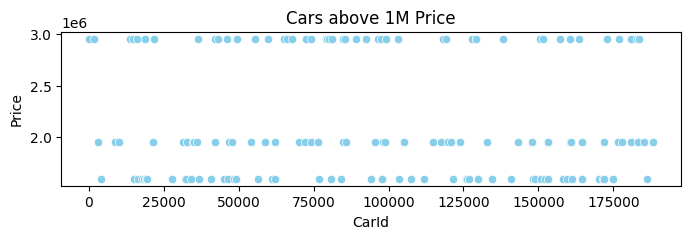

In [25]:
plt.figure(figsize=(8, 2))
sns.scatterplot(data=df[df.price>1000000], x='id', y='price', color='skyblue')

plt.title('Cars above 1M Price')
plt.xlabel('CarId')
plt.ylabel('Price')
plt.show()

### 5.1.2. Line Plot of all indices above 1 Million (3 groups separated)

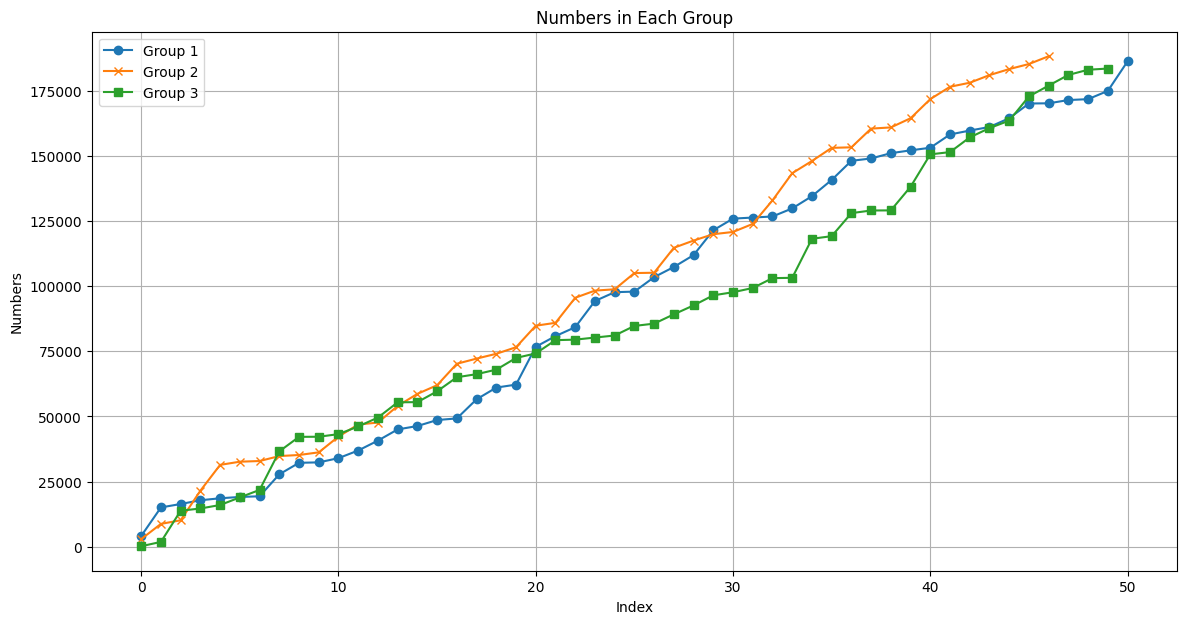

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(group1, label='Group 1', marker='o')
plt.plot(group2, label='Group 2', marker='x')
plt.plot(group3, label='Group 3', marker='s')
plt.xlabel('Index')
plt.ylabel('Numbers')
plt.title('Numbers in Each Group')
plt.legend()
plt.grid(True)
plt.show()

### 5.1.3. Density Plot of Indices

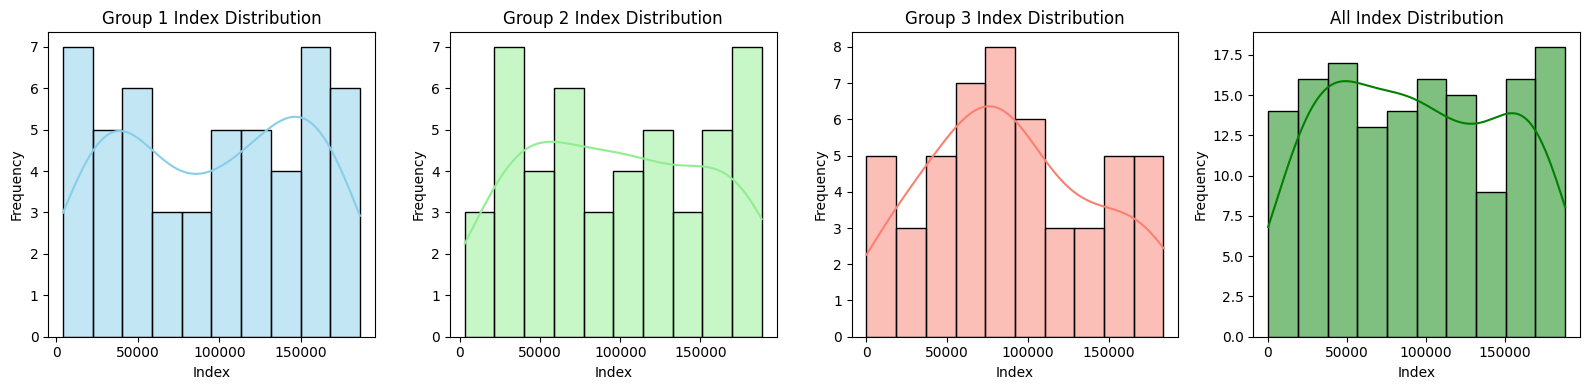

In [29]:
plt.figure(figsize=(16, 4))

# Group 1
plt.subplot(1, 4, 1)
sns.histplot(group1, bins=10, kde=True, color='skyblue')
plt.title('Group 1 Index Distribution')
plt.xlabel('Index')
plt.ylabel('Frequency')

# Group 2
plt.subplot(1, 4, 2)
sns.histplot(group2, bins=10, kde=True, color='lightgreen')
plt.title('Group 2 Index Distribution')
plt.xlabel('Index')
plt.ylabel('Frequency')

# Group 3
plt.subplot(1, 4, 3)
sns.histplot(group3, bins=10, kde=True, color='salmon')
plt.title('Group 3 Index Distribution')
plt.xlabel('Index')
plt.ylabel('Frequency')

# Group 4
plt.subplot(1, 4, 4)
sns.histplot(group4, bins=10, kde=True, color='green')
plt.title('All Index Distribution')
plt.xlabel('Index')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 5.1.4. Distribution in one place

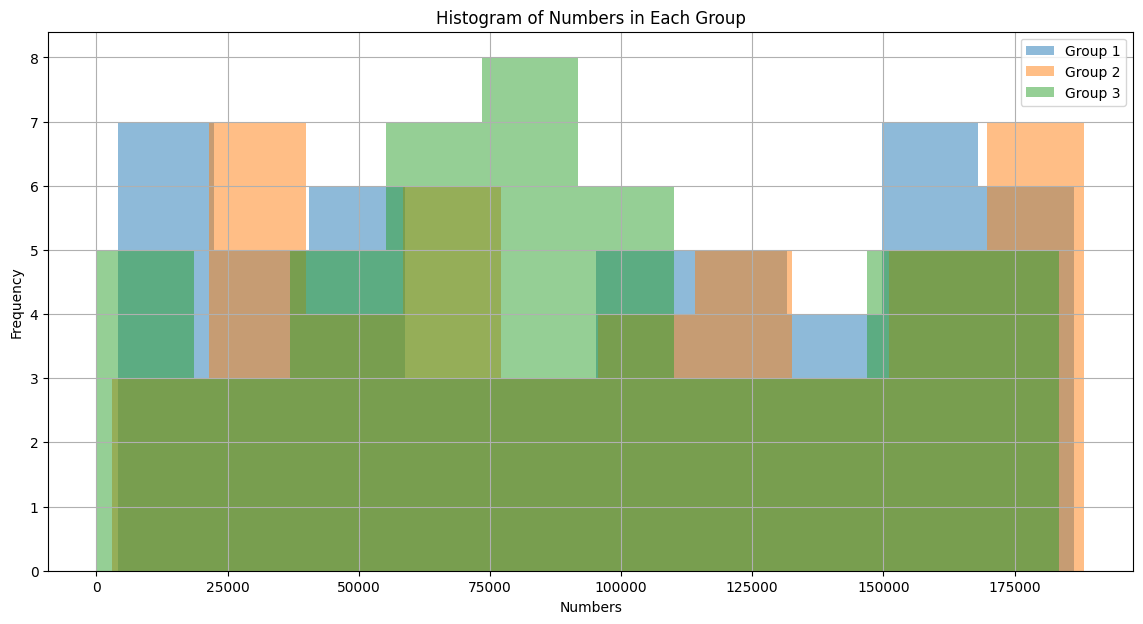

In [31]:
plt.figure(figsize=(14, 7))
plt.hist(group1, bins=10, alpha=0.5, label='Group 1')
plt.hist(group2, bins=10, alpha=0.5, label='Group 2')
plt.hist(group3, bins=10, alpha=0.5, label='Group 3')
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.title('Histogram of Numbers in Each Group')
plt.legend()
plt.grid(True)
plt.show()

### 5.1.5. Differences between consecutive incides

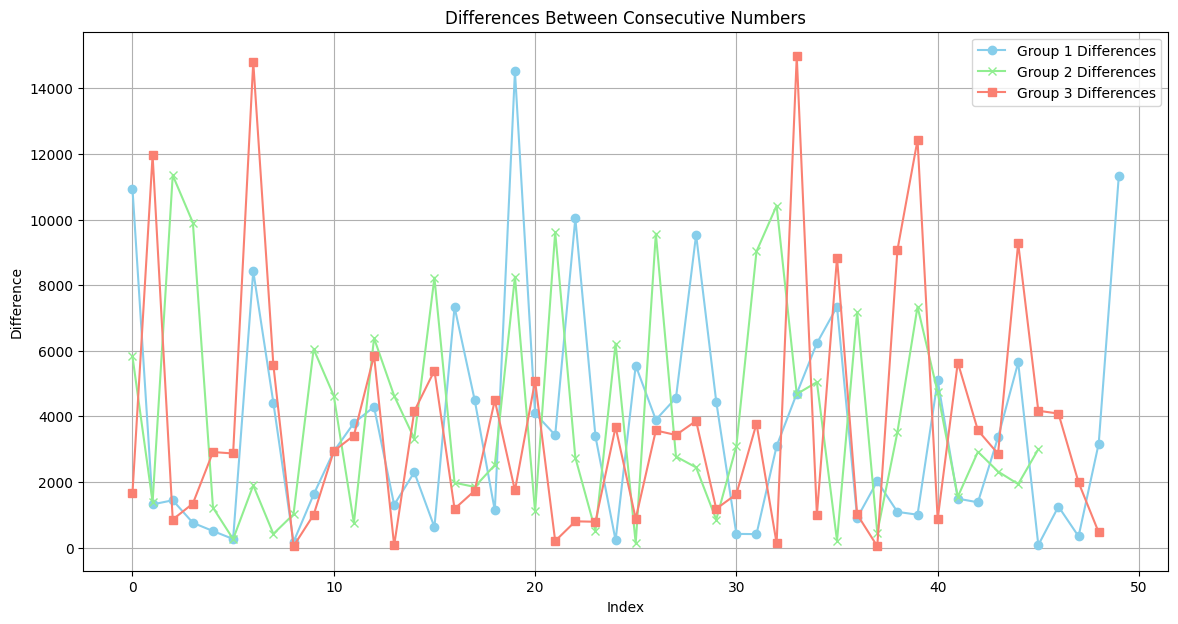

In [33]:
def compute_differences(group):
    return np.diff(group)

diff_group1 = compute_differences(group1)
diff_group2 = compute_differences(group2)
diff_group3 = compute_differences(group3)
diff_group4 = compute_differences(group4)

# Plotting differences
plt.figure(figsize=(14, 7))
plt.plot(diff_group1, label='Group 1 Differences', marker='o',color='skyblue' )
plt.plot(diff_group2, label='Group 2 Differences', marker='x', color='lightgreen')
plt.plot(diff_group3, label='Group 3 Differences', marker='s', color='salmon')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.title('Differences Between Consecutive Numbers')
plt.legend()
plt.grid(True)
plt.show()

### 5.1.6. Differences between consecutive incides - All groups in one

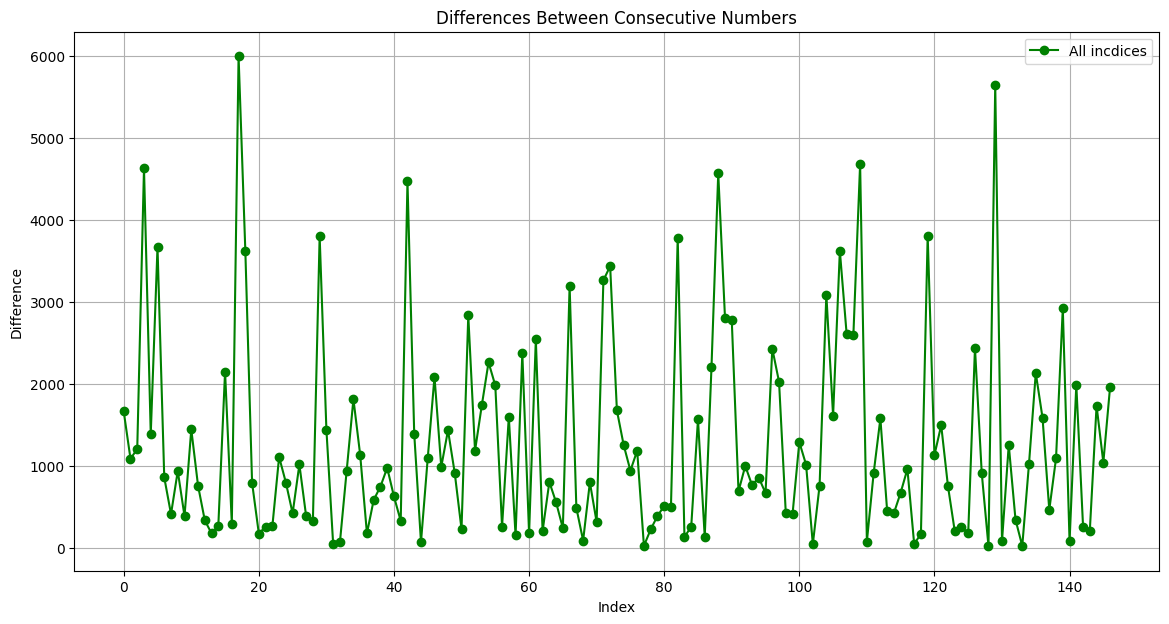

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(diff_group4, label='All incdices', marker='o',color='green')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.title('Differences Between Consecutive Numbers')
plt.legend()
plt.grid(True)
plt.show()

## 5.2. Statistical Summary of Indices

### 5.2.1. Indices numbers

In [38]:
def statistical_summary(group, group_name):
    print(f"{group_name} Statistics:")
    print(f"Count: {len(group)}")
    print(f"Mean: {np.mean(group):.2f}")
    print(f"Median: {np.median(group):.2f}")
    print(f"Standard Deviation: {np.std(group):.2f}")
    print(f"Minimum: {np.min(group)}")
    print(f"Maximum: {np.max(group)}\n")

statistical_summary(group1, "Group 1")
statistical_summary(group2, "Group 2")
statistical_summary(group3, "Group 3")
statistical_summary(group4, "Group 4")

Group 1 Statistics:
Count: 51
Mean: 95775.53
Median: 97895.00
Standard Deviation: 55924.00
Minimum: 4164
Maximum: 186234

Group 2 Statistics:
Count: 47
Mean: 97904.60
Median: 98279.00
Standard Deviation: 55638.77
Minimum: 2964
Maximum: 188194

Group 3 Statistics:
Count: 50
Mean: 89550.60
Median: 82893.50
Standard Deviation: 51575.22
Minimum: 220
Maximum: 183468

Group 4 Statistics:
Count: 148
Mean: 94348.64
Median: 93448.00
Standard Deviation: 54515.57
Minimum: 220
Maximum: 188194



### 5.2.2. Index differences

In [40]:
statistical_summary(diff_group1, "Diff. Group 1")
statistical_summary(diff_group2, "Diff. Group 2")
statistical_summary(diff_group3, "Diff. Group 3")
statistical_summary(diff_group4, "Diff. Group 4")

Diff. Group 1 Statistics:
Count: 50
Mean: 3641.40
Median: 3132.00
Standard Deviation: 3325.36
Minimum: 75
Maximum: 14519

Diff. Group 2 Statistics:
Count: 46
Mean: 4026.74
Median: 2958.50
Standard Deviation: 3187.01
Minimum: 130
Maximum: 11350

Diff. Group 3 Statistics:
Count: 49
Mean: 3739.76
Median: 2912.00
Standard Deviation: 3718.05
Minimum: 41
Maximum: 14978

Diff. Group 4 Statistics:
Count: 147
Mean: 1278.73
Median: 933.00
Standard Deviation: 1243.72
Minimum: 16
Maximum: 5993



## 5.3. Squence Analysis

### 5.3.1. Arithmetic Sequences

Check if the diffrences are approximately constant (with tolerance of 0.1)

In [43]:
def is_arithmetic_sequence(differences, tolerance=0.1):
    avg_diff = np.mean(differences)
    deviations = np.abs(differences - avg_diff)
    return np.all(deviations <= tolerance * avg_diff)

print("Group 1 is arithmetic sequence:", is_arithmetic_sequence(diff_group1))
print("Group 2 is arithmetic sequence:", is_arithmetic_sequence(diff_group2))
print("Group 3 is arithmetic sequence:", is_arithmetic_sequence(diff_group3))
print("Group 3 is arithmetic sequence:", is_arithmetic_sequence(diff_group4))

Group 1 is arithmetic sequence: False
Group 2 is arithmetic sequence: False
Group 3 is arithmetic sequence: False
Group 3 is arithmetic sequence: False


### 5.3.2. Geometric Sequences

Check if the ratios of consecutive index numbers are approximately constant (with tolerance 0.1)

In [45]:
def compute_ratios(group):
    return [j / i for i, j in zip(group[:-1], group[1:]) if i != 0]

ratios_group1 = compute_ratios(group1)
ratios_group2 = compute_ratios(group2)
ratios_group3 = compute_ratios(group3)
ratios_group4 = compute_ratios(group4)

def is_geometric_sequence(ratios, tolerance=0.1):
    avg_ratio = np.mean(ratios)
    deviations = np.abs(ratios - avg_ratio)
    return np.all(deviations <= tolerance * avg_ratio)

print("Group 1 is geometric sequence:", is_geometric_sequence(ratios_group1))
print("Group 2 is geometric sequence:", is_geometric_sequence(ratios_group2))
print("Group 3 is geometric sequence:", is_geometric_sequence(ratios_group3))
print("Group 4 is geometric sequence:", is_geometric_sequence(ratios_group4))

Group 1 is geometric sequence: False
Group 2 is geometric sequence: False
Group 3 is geometric sequence: False
Group 4 is geometric sequence: False


In [46]:
def compute_ratios(group):
    return [j / i for i, j in zip(group[:-1], group[1:]) if i != 0]

ratios_group1 = compute_ratios(group1)
ratios_group2 = compute_ratios(group2)
ratios_group3 = compute_ratios(group3)
ratios_group4 = compute_ratios(group4)

def is_geometric_sequence(ratios, tolerance=0.1):
    avg_ratio = np.mean(ratios)
    deviations = np.abs(ratios - avg_ratio)
    return np.all(deviations <= tolerance * avg_ratio)

print("Group 1 is geometric sequence:", is_geometric_sequence(ratios_group1))
print("Group 2 is geometric sequence:", is_geometric_sequence(ratios_group2))
print("Group 3 is geometric sequence:", is_geometric_sequence(ratios_group3))
print("Group 4 is geometric sequence:", is_geometric_sequence(ratios_group4))

Group 1 is geometric sequence: False
Group 2 is geometric sequence: False
Group 3 is geometric sequence: False
Group 4 is geometric sequence: False


## 5.4. Regression Analysis

### 5.4.1. Linear Regression for Index Numbers

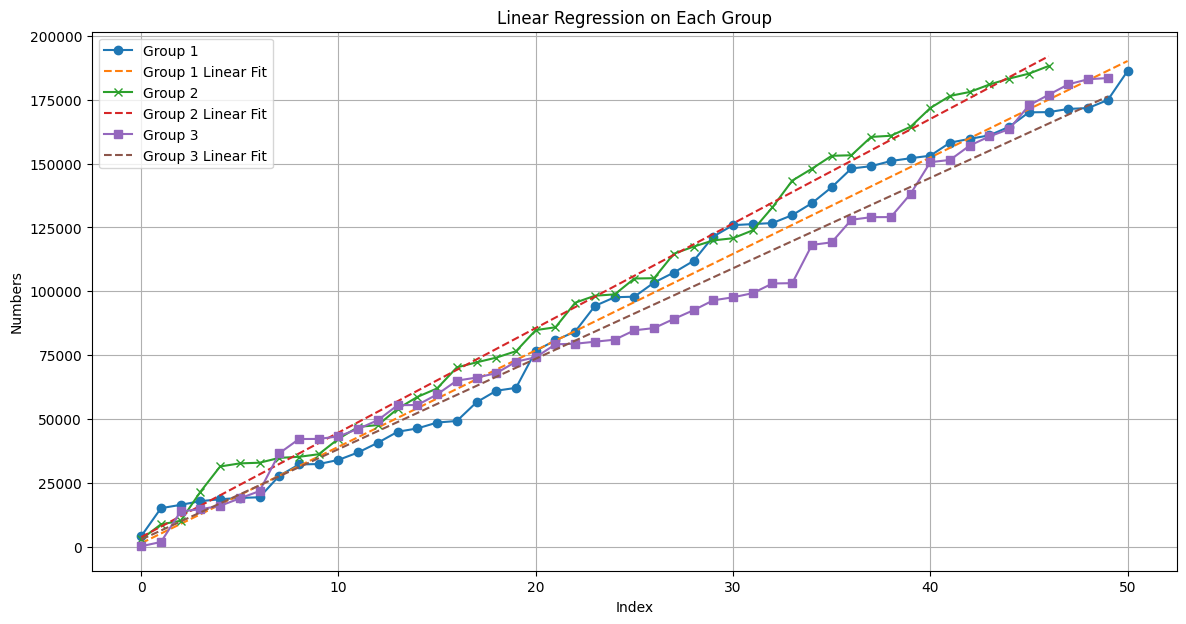

Group 1 Linear Coefficient: 3774.64
Group 2 Linear Coefficient: 4091.66
Group 3 Linear Coefficient: 3539.58


In [49]:
from sklearn.linear_model import LinearRegression

def fit_linear_regression(group):
    X = np.arange(len(group)).reshape(-1, 1)
    y = np.array(group)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    return model, y_pred

# Fit models
model1, y_pred1 = fit_linear_regression(group1)
model2, y_pred2 = fit_linear_regression(group2)
model3, y_pred3 = fit_linear_regression(group3)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(group1, label='Group 1', marker='o')
plt.plot(y_pred1, label='Group 1 Linear Fit', linestyle='--')
plt.plot(group2, label='Group 2', marker='x')
plt.plot(y_pred2, label='Group 2 Linear Fit', linestyle='--')
plt.plot(group3, label='Group 3', marker='s')
plt.plot(y_pred3, label='Group 3 Linear Fit', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Numbers')
plt.title('Linear Regression on Each Group')
plt.legend()
plt.grid(True)
plt.show()

# Display coefficients
print(f"Group 1 Linear Coefficient: {model1.coef_[0]:.2f}")
print(f"Group 2 Linear Coefficient: {model2.coef_[0]:.2f}")
print(f"Group 3 Linear Coefficient: {model3.coef_[0]:.2f}")

### 5.4.2. Linear Regression for Differences between index numbers

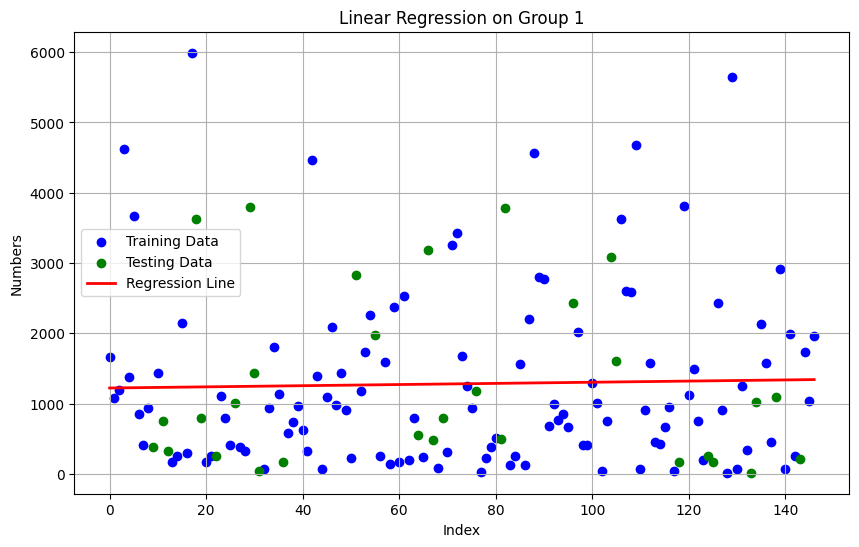

Group 1 Evaluation Metrics:
MSE: 1472517.72
RMSE: 1213.47
R² Score: -0.0082


In [51]:
X = np.arange(len(diff_group4)).reshape(-1, 1)  # Index as feature
y = np.array(diff_group4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Index')
plt.ylabel('Numbers')
plt.title('Linear Regression on Group 1')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Group 1 Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

### 5.4.3. Polynomial Regression for Differences between index numbers

Group 4 Polynomial Degree 1 Evaluation Metrics:
MSE: 1472517.72
RMSE: 1213.47
R² Score: -0.0082

Group 4 Polynomial Degree 2 Evaluation Metrics:
MSE: 1583756.69
RMSE: 1258.47
R² Score: -0.0844

Group 4 Polynomial Degree 3 Evaluation Metrics:
MSE: 1572739.93
RMSE: 1254.09
R² Score: -0.0769

Group 4 Polynomial Degree 4 Evaluation Metrics:
MSE: 1554367.00
RMSE: 1246.74
R² Score: -0.0643

Group 4 Polynomial Degree 5 Evaluation Metrics:
MSE: 1570641.38
RMSE: 1253.25
R² Score: -0.0754

Group 4 Polynomial Degree 6 Evaluation Metrics:
MSE: 1553926.98
RMSE: 1246.57
R² Score: -0.0640

Group 4 Polynomial Degree 7 Evaluation Metrics:
MSE: 1574016.84
RMSE: 1254.60
R² Score: -0.0777

Group 4 Polynomial Degree 8 Evaluation Metrics:
MSE: 1571776.96
RMSE: 1253.71
R² Score: -0.0762

Group 4 Polynomial Degree 9 Evaluation Metrics:
MSE: 1544340.64
RMSE: 1242.72
R² Score: -0.0574



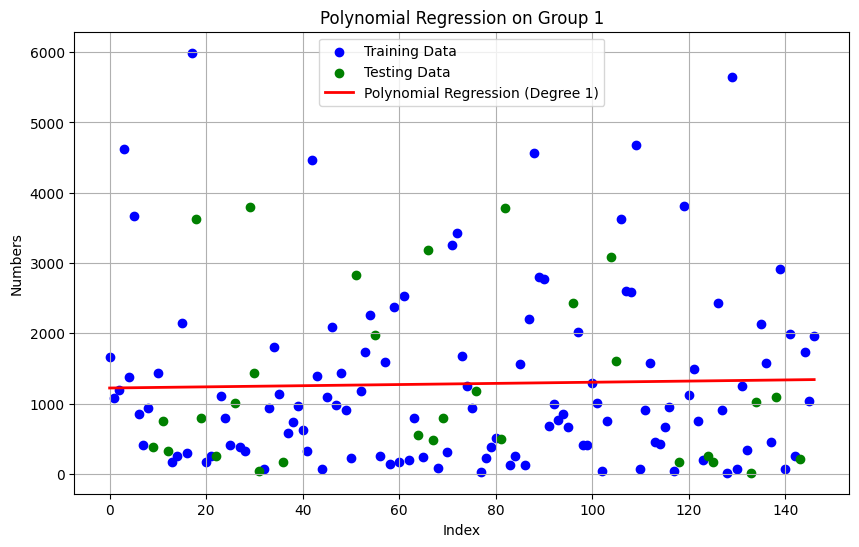

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = list(range(1,10))
models = {}
metrics = {}

for degree in degrees:
    # Transform features
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Store model and polynomial features
    models[degree] = (model, polynomial_features)
    
    # Predict on test set
    X_test_poly = polynomial_features.transform(X_test)
    y_pred = model.predict(X_test_poly)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics[degree] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
    
    print(f"Group 4 Polynomial Degree {degree} Evaluation Metrics:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}\n")

# Use the best model (degree=3)
best_degree = 1
model, polynomial_features = models[best_degree]

# Generate predictions across all X for plotting
X_poly = polynomial_features.transform(X)
y_pred_all = model.predict(X_poly)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X, y_pred_all, color='red', linewidth=2, label=f'Polynomial Regression (Degree {best_degree})')
plt.xlabel('Index')
plt.ylabel('Numbers')
plt.title('Polynomial Regression on Group 1')
plt.legend()
plt.grid(True)
plt.show()

According to iteration above, best degree is selected as 1 due to lowest MSE 1472517.72.

In [55]:
all_groups = sorted(set(group1 + group2 + group3))

## 5.5 Cluster Analysis

### 5.5.1 Analysis on Differences

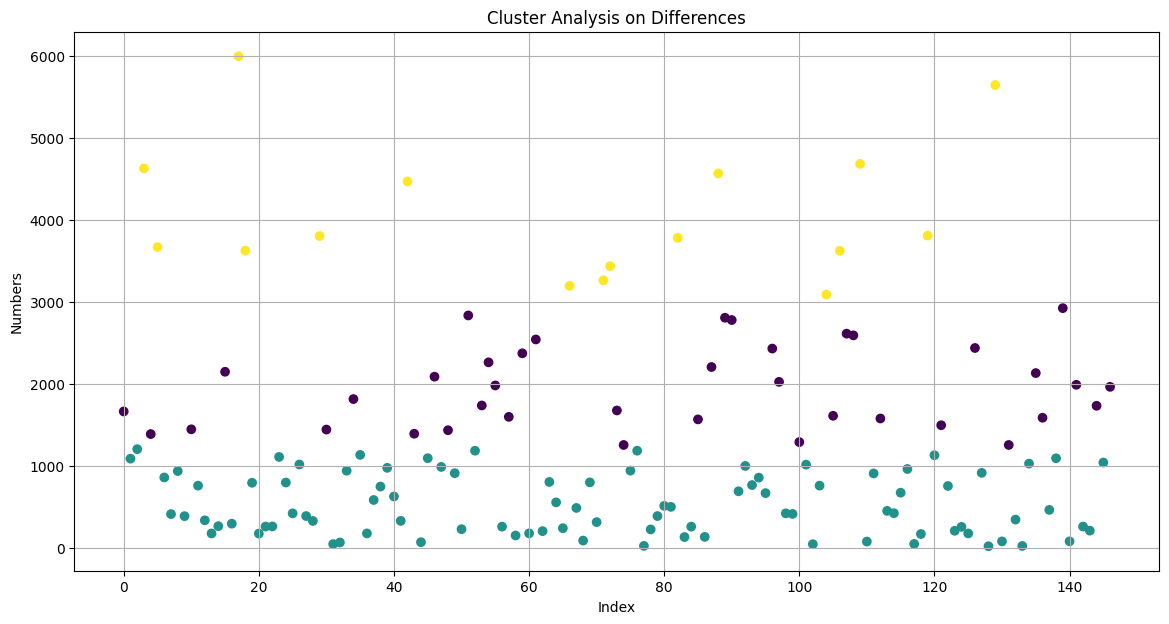

In [58]:
def cluster_group(group, n_clusters=3):
    X = np.array(group).reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    return labels

labels4 = cluster_group(diff_group4)


# Plot clusters for Group 1
plt.figure(figsize=(14, 7))
plt.scatter(range(len(diff_group4)), diff_group4, c=labels4)
plt.xlabel('Index')
plt.ylabel('Numbers')
plt.title('Cluster Analysis on Differences')
plt.grid(True)
plt.show()

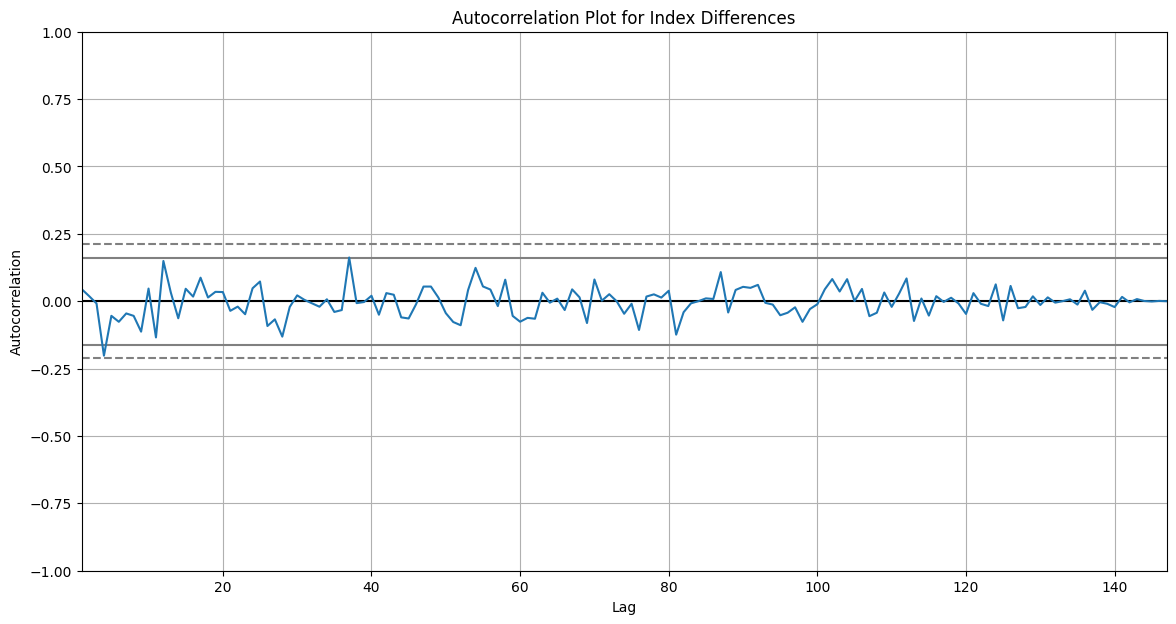

In [59]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(14, 7))
autocorrelation_plot(pd.Series(diff_group4))
plt.title('Autocorrelation Plot for Index Differences')
plt.show()

* The autocorrelation values seem to oscillate around zero without any significant long-term persistence.
* The values are generally within the confidence intervals (the dashed lines), indicating that most of the autocorrelation coefficients are not statistically significant, except for a few small spikes.
* Most lags exhibit autocorrelations very close to zero, suggesting that the difference between consecutive index values does not show a strong correlation with earlier differences. This means that the changes between consecutive index numbers are **largely random or independent**.
* The overall pattern of the plot is similar to what one might expect from white noise, where there is no autocorrelation between the values, and each difference between consecutive indices appears to be independent of the others. The lack of significant peaks further supports this observation.


## 5.6. Try to understand randomness

Here, we will try to understand if the index numbers with high values have been generated by random_state with trial and error.

In [63]:
def generate_samples(random_state):
    np.random.seed(random_state)
    samples = np.random.choice(range(1, 188533), size=148, replace=False)
    return sorted(samples)

def evaluate_similarity(original, generated):
    original_sorted = sorted(original)
    generated_sorted = sorted(generated)
    
    # Number of matches between the two sets
    original_set = set(original_sorted)
    generated_set = set(generated_sorted)
    matches = len(original_set & generated_set)
    
    # Sum of absolute differences (from your original code)
    abs_diff_sum = sum(abs(o - g) for o, g in zip(original_sorted, generated_sorted))
    
    # Mean Squared Error (MSE)
    mse = np.mean([(o - g) ** 2 for o, g in zip(original_sorted, generated_sorted)])
    
    return matches, abs_diff_sum, mse

best_state = None
best_matches = 0
lowest_abs_diff = float('inf')
lowest_mse = float('inf')

for state in range(4400, 4500):  # Increase this number for a more exhaustive search
    generated_samples = generate_samples(state)
    matches, abs_diff_sum, mse = evaluate_similarity(group4, generated_samples)
    
    # We prioritize the best matches, then lowest MSE if matches are equal
    if matches > best_matches or (matches == best_matches and mse < lowest_mse):
        best_matches = matches
        lowest_abs_diff = abs_diff_sum
        lowest_mse = mse
        best_state = state

# Output the best results
print(f"Best random_state: {best_state}")
print(f"Number of matches: {best_matches}")
print(f"MSE: {lowest_mse:.4f}")

Best random_state: 4463
Number of matches: 2
MSE: 11332590.0473


## 5.7. Deep Learning to predict pattern

/Users/deniz/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


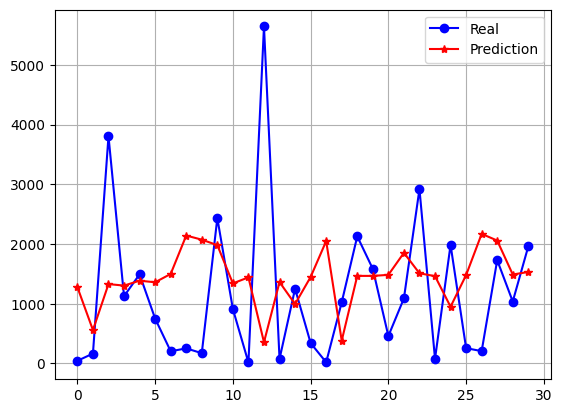

R² Score: -0.4208


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Function to create lagged data
def make_data(data, lag=1):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i:i + lag])
        y.append(data[i + lag])
    return np.array(X), np.array(y)

# Prepare the data
X, y = make_data(diff_group4, lag=30)
X = X[..., np.newaxis]  # Reshape to (samples, timesteps, features)

# Normalize the data
scaler = MinMaxScaler()
y = y.reshape(-1, 1)  # Reshape y for the scaler
y = scaler.fit_transform(y)  # Scale y

# Train-test split
X_train = X[:-30]
y_train = y[:-30]
X_test = X[-30:]
y_test = y[-30:]

# Build the model
mdl = keras.Sequential()
mdl.add(layers.LSTM(128, input_shape=X_train.shape[1:], return_sequences=False))
mdl.add(layers.Dropout(0.2))  # Dropout to prevent overfitting
mdl.add(layers.Dense(128, activation='relu'))
mdl.add(layers.Dropout(0.2))  # Dropout layer
mdl.add(layers.Dense(1, activation='linear'))

# Compile the model with a smaller learning rate
mdl.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['mape'])

# Train the model with validation
mdl.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=0)

# Predict on test set
y_pred = mdl.predict(X_test)

# Inverse transform the predictions and the test labels
y_pred = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.plot(y_test_inv, "-ob", label="Real")
plt.plot(y_pred, "-*r", label="Prediction")
plt.legend()
plt.grid()
plt.show()

# Print R² score
print(f"R² Score: {r2_score(y_test_inv, y_pred):.4f}")

## 5.8. Gradient Boosting Regressor to predict pattern

Best R² Score: 0.3137 with Lag: 31 and Test Size: 10


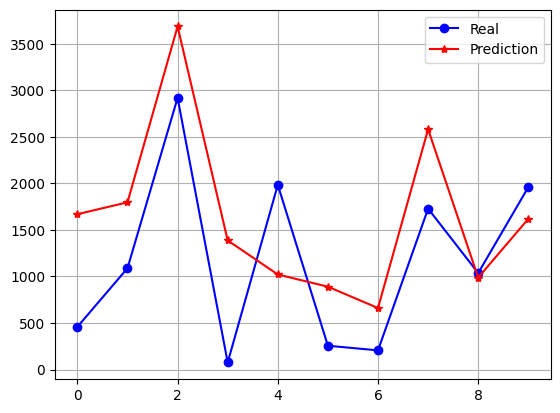

Final R² Score: 0.1833


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Your existing make_data function
def make_data(data, lag=1):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i: i + lag])
        y.append(data[i + lag])
    return np.array(X), np.array(y)

# Your diff_group4 data assumed to be defined
# Example: diff_group4 = np.random.randn(150)  # Simulate your diff_group4 data

best_r2 = float('-inf')
best_lag = None
best_index = None

# Grid search over a range of lag and index values
for lag in range(1, 74, 1):  # Try lag values from 1 to 50 with step size of 5
    for test_size in range(10, 74, 1):  # Try test sizes from 10 to 50 with step size of 5
        # Create the dataset with the current lag
        X, y = make_data(diff_group4, lag=lag)
        
        # Split the data into training and testing based on the test_size
        X_train = X[:-test_size]
        y_train = y[:-test_size]
        X_test = X[-test_size:]
        y_test = y[-test_size:]
        
        # Train the model
        mdl = GradientBoostingRegressor()
        mdl.fit(X_train, y_train)
        y_pred = mdl.predict(X_test)
        
        # Evaluate the performance
        r2 = r2_score(y_test, y_pred)
        
        # Keep track of the best parameters based on R² score
        if r2 > best_r2:
            best_r2 = r2
            best_lag = lag
            best_index = test_size

# Display the best lag and index values
print(f"Best R² Score: {best_r2:.4f} with Lag: {best_lag} and Test Size: {best_index}")

# Train the final model with the best lag and test size
X, y = make_data(diff_group4, lag=best_lag)
X_train = X[:-best_index]
y_train = y[:-best_index]
X_test = X[-best_index:]
y_test = y[-best_index:]

mdl = GradientBoostingRegressor()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

# Plot the predictions vs actual values
plt.plot(y_test, "-ob", label="Real")
plt.plot(y_pred, "-*r", label="Prediction")
plt.legend()
plt.grid()
plt.show()

print(f"Final R² Score: {r2_score(y_test, y_pred):.4f}")

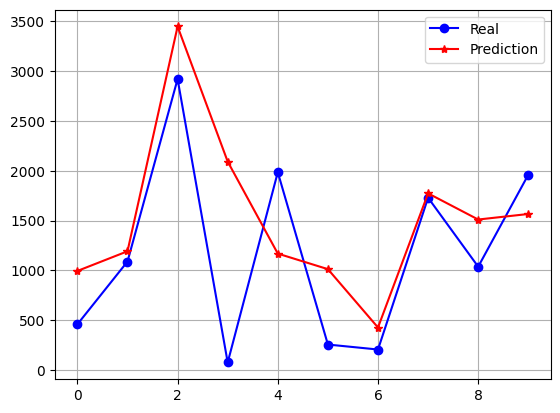

0.2264211150389166


In [68]:
def make_data(data, lag = 30):
  X = []
  y = []
  for i in range(len(data) - lag):
    X.append(data[i : i + lag])
    y.append(data[i + lag])
  return np.array(X), np.array(y)

X, y = make_data(diff_group4, lag = 30)

X_train = X[:-10]
y_train = y[:-10]
X_test = X[-10:]
y_test = y[-10:]

mdl = GradientBoostingRegressor()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)


plt.plot(y_test, "-ob", label = "Real")
plt.plot(y_pred, "-*r", label = "Prediction")
plt.legend()
plt.grid()
plt.show()
print(r2_score(y_test, y_pred))

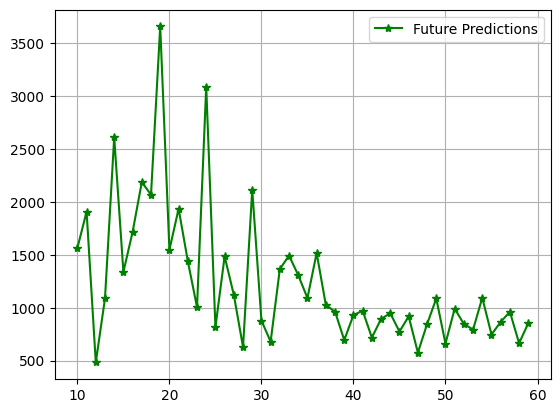

In [69]:
# Now, predict 150 more points
def predict_future(model, last_data, n_predictions=50, lag=30):
    predictions = []
    current_input = last_data

    for _ in range(n_predictions):
        pred = model.predict(current_input.reshape(1, -1))
        predictions.append(pred[0])

        # Update the input: remove the oldest point and add the new prediction
        current_input = np.append(current_input[1:], pred)
    
    return np.array(predictions)

# Get the last part of the data to use for predicting new points
last_input = X[-1]
future_predictions = predict_future(mdl, last_input, n_predictions=50)

# Plot the future predictions
plt.plot(np.arange(len(y_test), len(y_test) + 50), future_predictions, "-*g", label="Future Predictions")
plt.legend()
plt.grid()
plt.show()

# 6. Conclusion

Identifying the error pattern in this dataset is challenging. Many exploratory data analysis (EDA) techniques fail to reveal any clear visual patterns. Additionally, statistical analysis indicates no discernible trend in the differences between consecutive index numbers. While linear and polynomial regression models are functional, they yield results with significant errors. The most accurate performance has been achieved using the Gradient Boosting Regressor. A total of 50 predictions were generated and visualized, and the results will be saved in a CSV file.

Saving predictions to a CSV file.

In [73]:
predictions_df = pd.DataFrame(future_predictions, columns=['Predictions'])
predictions_df.to_csv('future_predictions.csv', index=False)
print("Done!")

Done!
